## COVID-19 Time Series Data by Johns Hopkins CSSE
https://github.com/CSSEGISandData/COVID-19

In [1]:
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.set(style="darkgrid")

In [2]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/time_series/time_series_2019-ncov-Confirmed.csv')
death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/time_series/time_series_2019-ncov-Deaths.csv')
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/time_series/time_series_2019-ncov-Recovered.csv')

In [3]:
data = confirmed.agg(['sum']).filter(regex = '[0-9]+/[0-9]+/20.*').astype(int).T.reset_index().rename(columns={'index':'Date','sum':'Confirmed'})
data1 = death.agg(['sum']).filter(regex = '[0-9]+/[0-9]+/20.*').astype(int).T.reset_index().rename(columns={'index':'Date','sum':'Death'})
data2 = recovered.agg(['sum']).filter(regex = '[0-9]+/[0-9]+/20.*').astype(int).T.reset_index().rename(columns={'index':'Date','sum':'Recovered'})

data['Date'] = pd.to_datetime(data['Date'])
data['Death'] = data1['Death']
data['Recovered'] = data2['Recovered']
data

,Date,Confirmed,Death,Recovered
0,2020-01-21 22:00:00,330,0,25
1,2020-01-22 12:00:00,555,0,28
2,2020-01-23 12:00:00,654,0,30
3,2020-01-24 00:00:00,881,26,34
4,2020-01-24 12:00:00,941,26,36
5,2020-01-25 00:00:00,1353,34,38
6,2020-01-25 12:00:00,1434,42,39
7,2020-01-25 22:00:00,2014,55,49
8,2020-01-26 11:00:00,2118,56,52
9,2020-01-26 23:00:00,2794,80,54


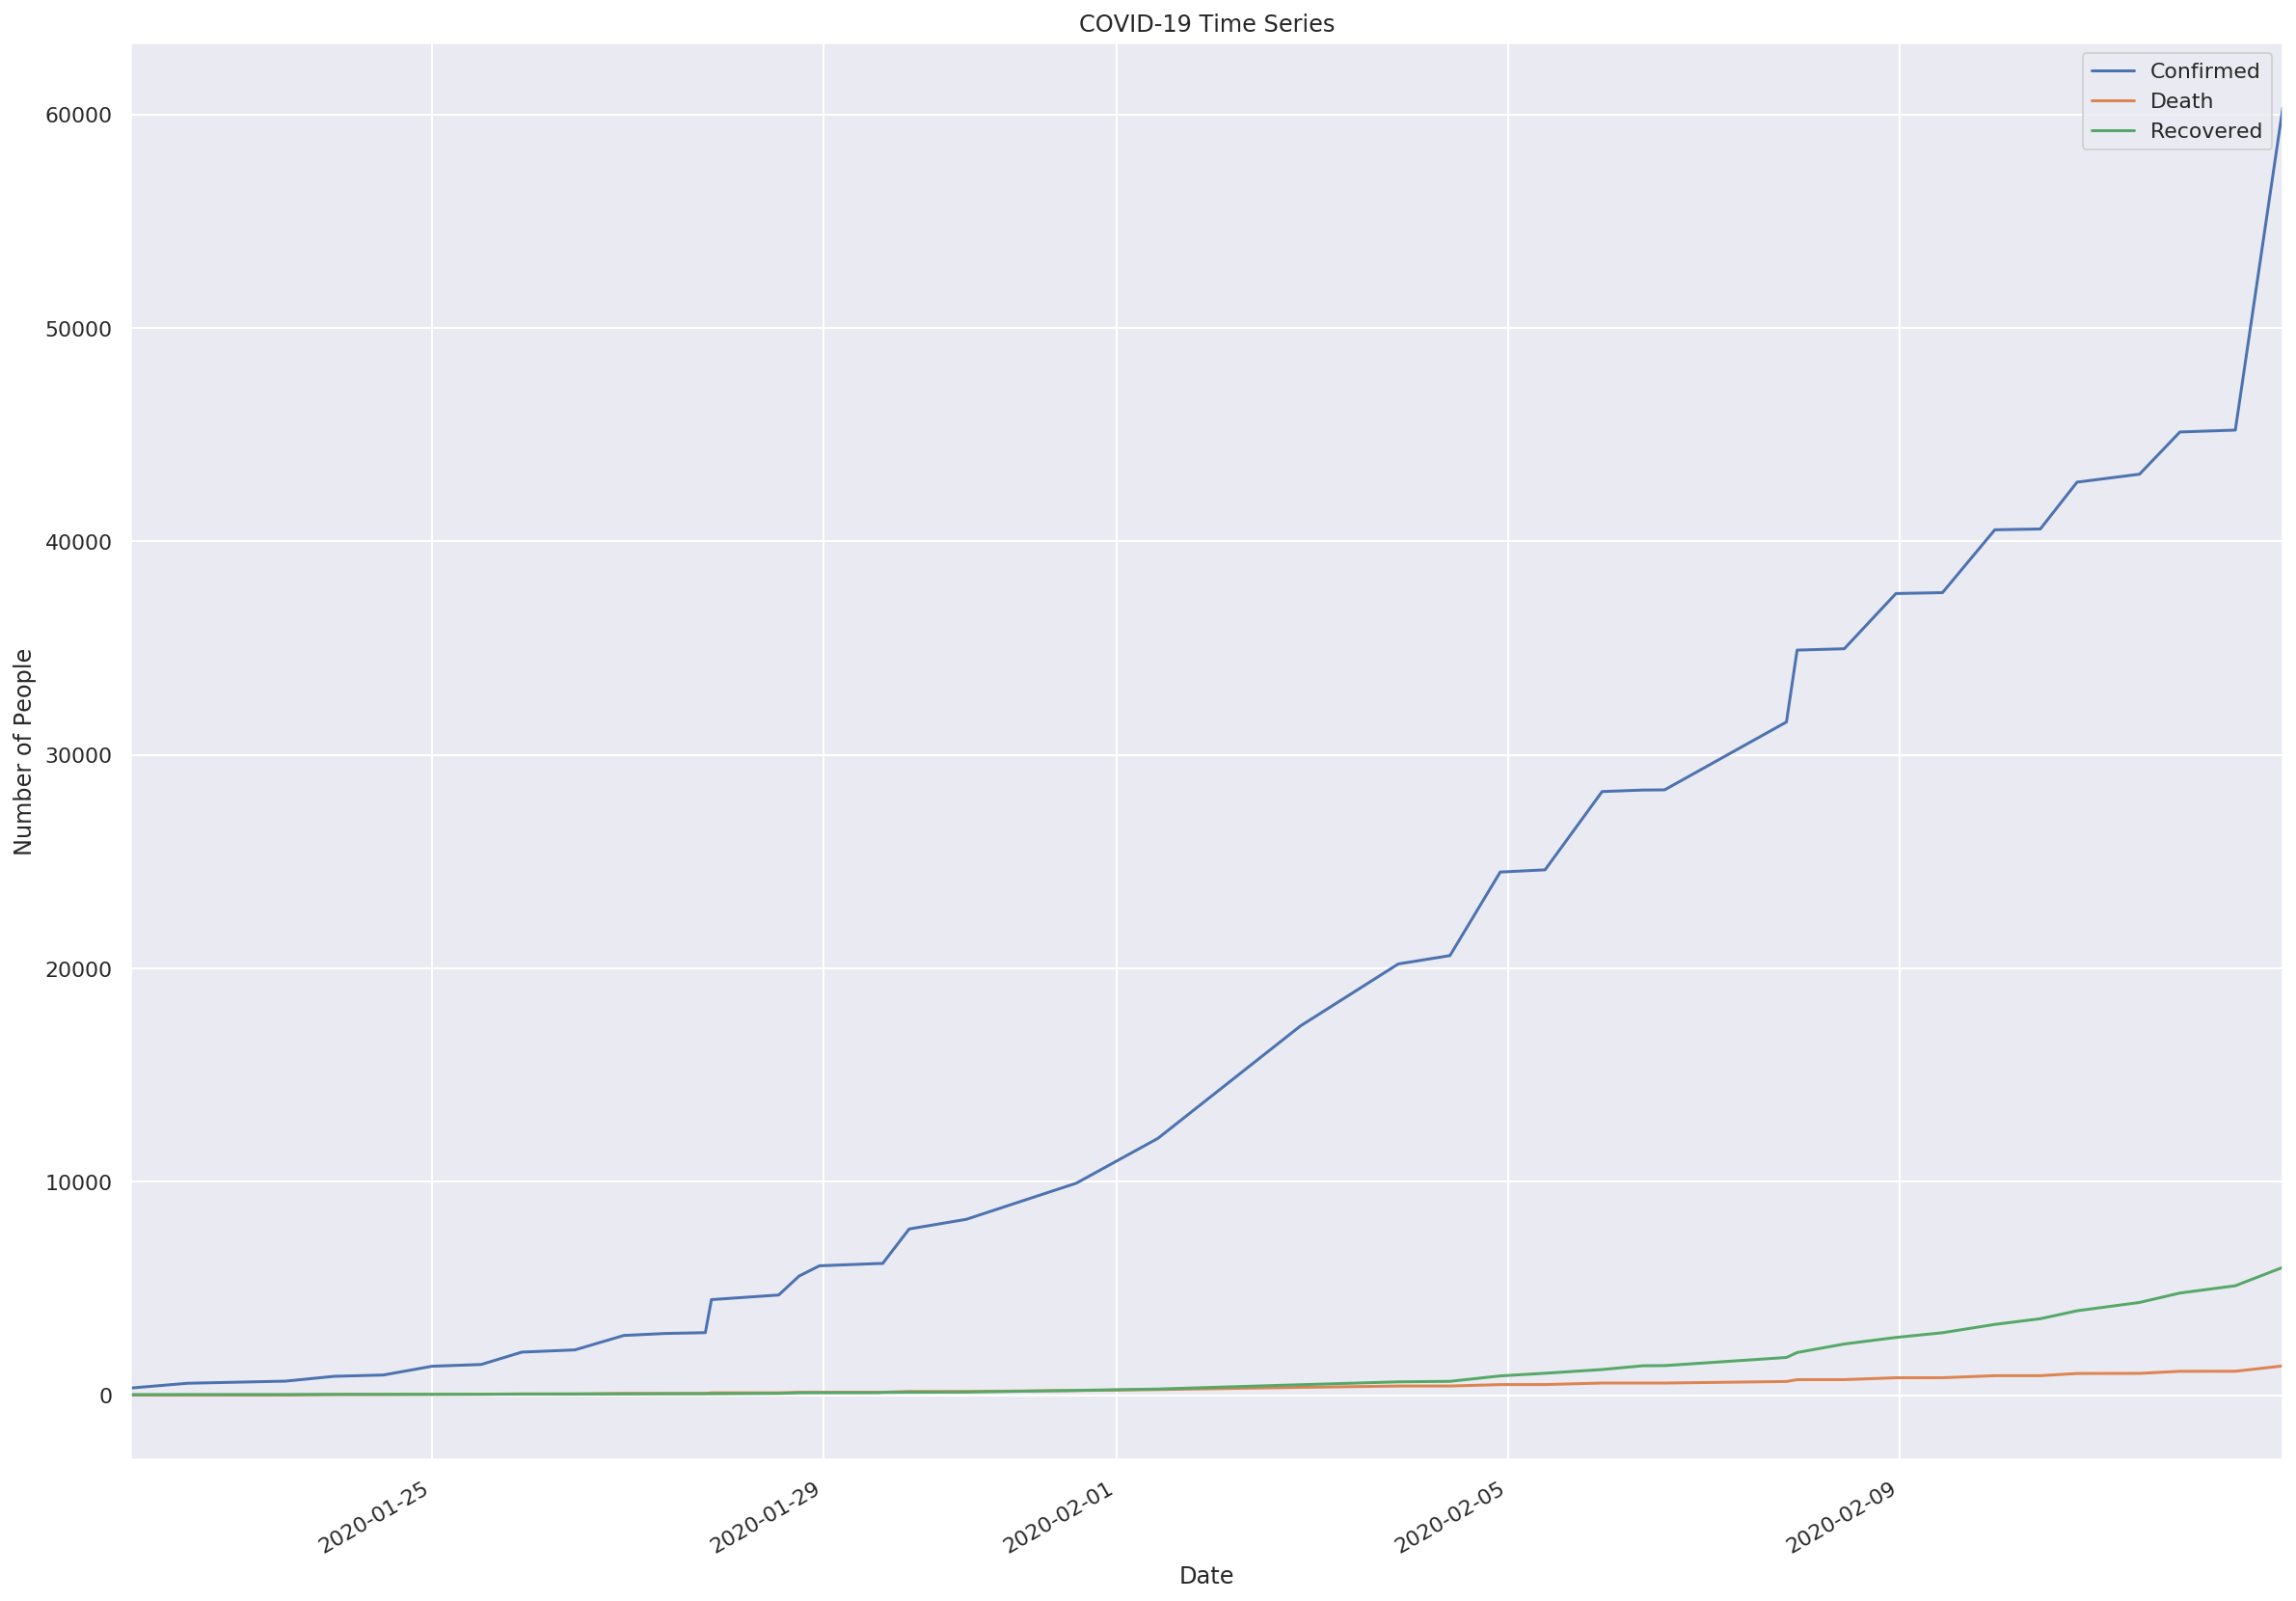

In [4]:
ax = data.plot(x='Date', figsize=(20,15), title='COVID-19 Time Series')
ax.set_ylabel('Number of People')
ax

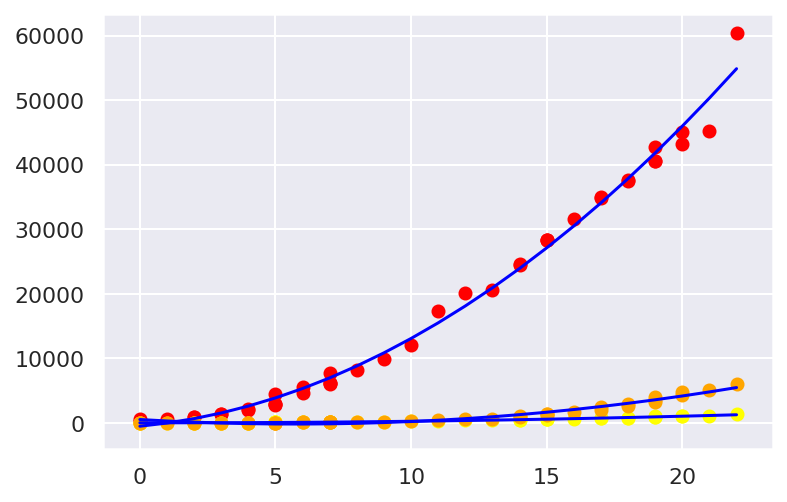

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

data['Days'] = (data['Date'] - data['Date'].min()) // pd.Timedelta('1d')

x = data.filter(['Days'])
y1 = data['Confirmed']
y2 = data['Death']
y3 = data['Recovered']

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()

model1.fit(x_poly, y1)
model2.fit(x_poly, y2)
model3.fit(x_poly, y3)
y1_poly_pred = model1.predict(x_poly)
y2_poly_pred = model2.predict(x_poly)
y3_poly_pred = model3.predict(x_poly)

plt.scatter(x, y1, color='red')
plt.scatter(x, y2, color='yellow')
plt.scatter(x, y3, color='orange')

#x = pd.DataFrame(list(range(60)))
plt.plot(x, model1.predict(polynomial_features.fit_transform(x)), color='blue')
plt.plot(x, model2.predict(polynomial_features.fit_transform(x)), color='blue')
plt.plot(x, model3.predict(polynomial_features.fit_transform(x)), color='blue')